In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


In this notebook we show how to plog the sublevel set of $2x^4 + 2y^4$ and its polar.
We first write it as a sum of squares:

In [2]:
using DynamicPolynomials
@polyvar x y
using SetProg
sos = SetProg.SumOfSquares.SOSDecomposition([√2x^2, √2y^2])

(1.4142135623730951*x^2)^2 + (1.4142135623730951*y^2)^2

Now we create the set from this sum of squares decomposition of the polynomial. We claim that it is convex (as we want to plot the polar) by creating a `ConvexPolynomialSublevelSetAtOrigin` even if we give `nothing` in place of the convexity certificate.

In [3]:
using SetProg
set = SetProg.Sets.ConvexPolynomialSublevelSetAtOrigin(4, SetProg.SumOfSquares.GramMatrix(sos), nothing)

SetProg.Sets.ConvexPolynomialSublevelSetAtOrigin{Float64}(4, SumOfSquares.GramMatrix{Float64,Monomial{true},MonomialVector{true}}([2.0 0.0; 0.0 2.0], Monomial{true}[x², y²]), nothing)

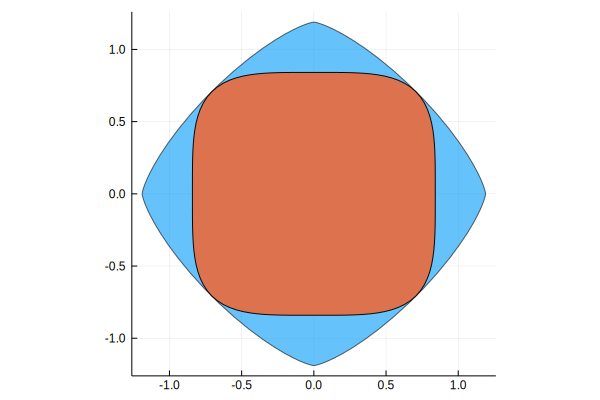

In [4]:
using Plots
plot(ratio=:equal)
plot!(SetProg.Sets.polar(set), npoints=128, alpha=0.6)
plot!(set, npoints=128, alpha=0.95)